In [4]:
# !pip install biopython

In [5]:
# !pip install peptides

In [6]:
import peptides
import Bio.SeqUtils as BioUtils
from Bio.Seq import Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Here examples of peptides/epitopes from VDJdb:

- FLKEKGGL
- LQPFPQPELPYPQPQ
- LLQTGIHVRVSQPSL
- EHPTFTSQYRIQGKL

[Documentation](https://pypi.org/project/peptides/)

In [7]:
peptide1_Peptide = peptides.Peptide("FLKEKGGL")
peptide2_Peptide = peptides.Peptide("LQPFPQPELPYPQPQ")
peptide3_Peptide = peptides.Peptide("LLQTGIHVRVSQPSL")
peptide4_Peptide = peptides.Peptide("EHPTFTSQYRIQGKL")

list_peptides_Peptide = [peptide1_Peptide, peptide2_Peptide, peptide3_Peptide, peptide4_Peptide]

In [8]:
peptide1_Biopython = Seq("FLKEKGGL")
peptide2_Biopython = Seq("LQPFPQPELPYPQPQ")
peptide3_Biopython = Seq("LLQTGIHVRVSQPSL")
peptide4_Biopython = Seq("EHPTFTSQYRIQGKL")

list_peptides_Biopython = [peptide1_Biopython, peptide2_Biopython, peptide3_Biopython, peptide4_Biopython]

[ImRex](https://www.biorxiv.org/content/10.1101/2019.12.18.880146v2.full) used: 
- mass, 
- hydrophobicity,
- hydrophilicity, 
- isoelectric point

Calcualted w/ [biopython](https://biopython.org/wiki/Download)

They then used a so-called "interaction map" where they computed the dot-product of 

In [9]:
# Biopython 
# molecular mass of the amino acid complex
for i, peptide in enumerate(list_peptides_Biopython): 
    print(f"peptide{i}: {BioUtils.molecular_weight(peptide, 'protein')}")

peptide0: 891.0654999999999
peptide1: 1778.9995
peptide2: 1647.9160999999995
peptide3: 1804.9988000000003


In [10]:
# Peptides
# molecular mass of the amino acid complex
for i, peptide in enumerate(list_peptides_Peptide): 
    print(f"peptide{i}: {peptide.molecular_weight()}")

peptide0: 891.0781400000001
peptide1: 1779.0251399999997
peptide2: 1647.9381399999997
peptide3: 1805.0232399999998


**Same result if Biopython or Peptides!**

In [11]:
# Biopython
# Hydrophobicity: if positive => hydrophobic, if negative => hydrophilic
for i, peptide in enumerate(list_peptides_Biopython): 
    print(f"peptide{i}: {ProteinAnalysis(peptide).gravy()}")

peptide0: -0.21250000000000013
peptide1: -1.2
peptide2: 0.3533333333333333
peptide3: -1.0999999999999999


In [12]:
# Peptides
# Hydrophobicity: if positive => hydrophobic, if negative => hydrophilic
for i, peptide in enumerate(list_peptides_Peptide): 
    print(f"peptide{i}: {peptide.hydrophobicity()}")

peptide0: -0.21250000000000008
peptide1: -1.2
peptide2: 0.3533333333333333
peptide3: -1.0999999999999999


**Same result if Biopython or Peptides!**

In [13]:
# Biopython
# Isoelectric Point
for i, peptide in enumerate(list_peptides_Biopython): 
    print(f"peptide{i}: {ProteinAnalysis(peptide).isoelectric_point()}")

peptide0: 8.591073036193851
peptide1: 4.0500284194946286
peptide2: 9.756532478332517
peptide3: 8.692417335510253


In [14]:
# Peptides
# Isoelectric Point
for i, peptide in enumerate(list_peptides_Peptide): 
    print(f"peptide{i}: {peptide.isoelectric_point()}")

peptide0: 9.53730092663318
peptide1: 3.8499827128835022
peptide2: 10.551758703775704
peptide3: 9.299755305983126


<span style="color:red">**The results are different!!!**</span>

In [15]:
# Dictionary to hold the peptide dictionaries
peptide_dicts = {}

# Iterate through each peptide, create a dictionary for each, and populate it with descriptors
for i, peptide in enumerate(list_peptides_Peptide):
    peptide_dict_name = f"peptide{i}_dict"
    peptide_dicts[peptide_dict_name] = peptide.descriptors()

In [16]:
peptide_dicts["peptide0_dict"]

{'AF1': 0.15106244999999996,
 'AF2': -0.22940727749999995,
 'AF3': 0.5106304374999999,
 'AF4': 0.472964725,
 'AF5': 0.646765985,
 'BLOSUM1': 0.12749999999999995,
 'BLOSUM2': -0.02749999999999999,
 'BLOSUM3': -0.11000000000000004,
 'BLOSUM4': -0.2,
 'BLOSUM5': -0.028750000000000026,
 'BLOSUM6': 0.43375,
 'BLOSUM7': 0.25375000000000003,
 'BLOSUM8': 0.345,
 'BLOSUM9': 0.0875,
 'BLOSUM10': -0.28125,
 'PP1': -0.28375,
 'PP2': -0.22500000000000003,
 'PP3': 0.11625,
 'F1': -0.11074999999999997,
 'F2': 0.08037500000000003,
 'F3': -0.04512499999999997,
 'F4': 0.889875,
 'F5': -0.1325,
 'F6': -0.19724999999999995,
 'KF1': -0.18750000000000003,
 'KF2': -0.13875,
 'KF3': -0.42125,
 'KF4': 0.07749999999999999,
 'KF5': 0.13624999999999998,
 'KF6': -0.99625,
 'KF7': 0.94625,
 'KF8': 0.565,
 'KF9': -0.25249999999999995,
 'KF10': 0.4275,
 'MSWHIM1': -0.265,
 'MSWHIM2': 0.18749999999999997,
 'MSWHIM3': -0.125,
 'E1': 0.034999999999999976,
 'E2': 0.02237500000000002,
 'E3': -0.113625,
 'E4': -0.125875000

In [17]:
len(peptide_dicts["peptide0_dict"])

102

------------------------------------------------------------------------------------------------------

**ImRex**

In the following we try to reproduce the so-claled "interaction maps" of the ImRex paper. Therefore, we can use the above gained experience with Biopython, as they implemented their physicochemical properties using the Biopython package.

Citate form the paper: 

"In our experiments, the interaction map for each CDR3-epitope pair was constructed as follows. First, each sequence in the pair was converted into a vector of physicochemical property values of each amino acid. Next, a matrix was computed that contained the pairwise absolute differences between the elements of the two vectors. One such twodimensional matrix was created for each of the following physicochemical properties: hydrophobicity, hydrophilicity, mass and isoelectric point (29). Every element in the matrix was then scaled between zero and one, based on the minimum and maximum possible values of each property. Next, the matrices were zero-padded on both sides to a dimension of 20 × 11 (CDR3 × epitope)."

For this examples we use data from the VDJdb, stored in our W&B cloud.

<span style="color:red">I am unsure about the padding... "on botch sides is a bit generic => would not make it even more sense to padd the vector instead of the matrix?"</span>

In [18]:
epitope1 = Seq("LLWNGPMAV")
epitope1_mass = []

cdr3_1 = "FYQEHDGSDSAC"
cdr3_1_mass = []

for amino_acid in cdr3_1:
    mass = BioUtils.molecular_weight(amino_acid, "protein")
    cdr3_1_mass.append(mass)

print("OK") if len(cdr3_1) == len(cdr3_1_mass) else print("ERROR")
print(f"len of cdr3_mass: {len(cdr3_1_mass)}")
cdr3_1_mass

OK
len of cdr3_mass: 12


[165.1891,
 181.1885,
 146.1445,
 147.1293,
 155.1546,
 133.1027,
 75.0666,
 105.0926,
 133.1027,
 105.0926,
 89.0932,
 121.1582]

In [19]:
for amino_acid in epitope1: 
    print(amino_acid)
    mass = BioUtils.molecular_weight(amino_acid, "protein")
    epitope1_mass.append(mass)

epitope1_mass

L
L
W
N
G
P
M
A
V


[131.1729,
 131.1729,
 204.2252,
 132.1179,
 75.0666,
 115.1305,
 149.2113,
 89.0932,
 117.1463]

In [20]:
epitope1_mass_np = np.array(epitope1_mass)
epitope1_mass_np.T

array([131.1729, 131.1729, 204.2252, 132.1179,  75.0666, 115.1305,
       149.2113,  89.0932, 117.1463])

In [21]:
cdr3_1_mass_np = np.array(cdr3_1_mass)
epitope1_mass_np = np.array(epitope1_mass)

difference_matrix = np.abs(cdr3_1_mass_np[:, np.newaxis] - epitope1_mass_np)
# print(f"difference_matrix: \n{difference_matrix}")
print(f"difference_matrix.shape: \n{difference_matrix.shape}")

min_value = np.min(difference_matrix)
max_value = np.max(difference_matrix)
scaled_difference_matrix = (difference_matrix - min_value) / (max_value - min_value)
# print(f"scaled_difference_matrix: \n{scaled_difference_matrix}")
print(f"scaled_difference_matrix.shape: \n{scaled_difference_matrix.shape}")

# Desired shape
desired_shape = (20, 11)

# Initialize a new matrix of zeros with the desired shape
padded_matrix = np.zeros(desired_shape)

# Calculate the number of zeros to add on each side horizontally
left_padding = (desired_shape[1] - scaled_difference_matrix.shape[1]) // 2
right_padding = desired_shape[1] - scaled_difference_matrix.shape[1] - left_padding

# Copy the scaled difference matrix into the center of the new zero matrix
padded_matrix[:scaled_difference_matrix.shape[0], left_padding:-right_padding] = scaled_difference_matrix

# If the right_padding is 0, the slicing index should not be negative; adjust for that case
if right_padding == 0:
    padded_matrix[:scaled_difference_matrix.shape[0], left_padding:] = scaled_difference_matrix

padded_matrix

difference_matrix.shape: 
(12, 9)
scaled_difference_matrix.shape: 
(12, 9)


array([[0.        , 0.26336767, 0.26336767, 0.30223384, 0.25605109,
        0.69776616, 0.38757466, 0.12370682, 0.58916634, 0.37196749,
        0.        ],
       [0.        , 0.38724173, 0.38724173, 0.17835978, 0.37992515,
        0.82164022, 0.51144871, 0.24758088, 0.7130404 , 0.49584155,
        0.        ],
       [0.        , 0.1159164 , 0.1159164 , 0.44968512, 0.10859981,
        0.55031488, 0.24012338, 0.02374445, 0.44171507, 0.22451621,
        0.        ],
       [0.        , 0.12354113, 0.12354113, 0.44206038, 0.11622455,
        0.55793962, 0.24774812, 0.01611972, 0.4493398 , 0.23214095,
        0.        ],
       [0.        , 0.18567637, 0.18567637, 0.37992515, 0.17835978,
        0.62007485, 0.30988335, 0.04601552, 0.51147504, 0.29427618,
        0.        ],
       [0.        , 0.01494132, 0.01494132, 0.5506602 , 0.00762473,
        0.4493398 , 0.1391483 , 0.12471953, 0.34073999, 0.12354113,
        0.        ],
       [0.        , 0.43439848, 0.43439848, 1.        , 0.

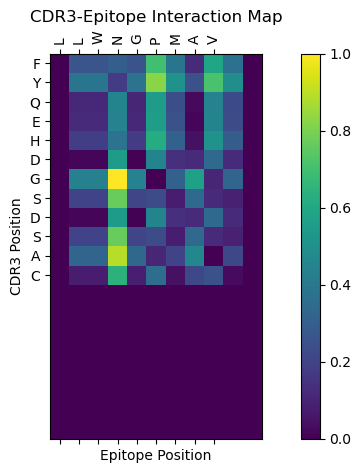

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
interaction_map = padded_matrix  # Replace with your actual data
cax = ax.matshow(interaction_map, cmap='viridis')
# Add colorbar to interpret the values
fig.colorbar(cax)
ax.set_xticks(np.arange(len(epitope1)))
ax.set_yticks(np.arange(len(cdr3_1)))

ax.set_xticklabels(list(epitope1))
ax.set_yticklabels(list(cdr3_1))

# Rotate the tick labels for the x-axis to display vertically
plt.xticks(rotation=90)
ax.set_xlabel('Epitope Position')
ax.set_ylabel('CDR3 Position')
ax.set_title('CDR3-Epitope Interaction Map')
plt.show()


The plot looks like this, beacuse (as I understood) the matrix gets padding "on both sides" to a size of 20x11! (see description above for more details!)

------------------------------------------------------------------------------------------------------

**MATE-Pred**

In the following we try to reproduce the physicochemical properties used in the [MATE-Pred paper](https://www.biorxiv.org/content/10.1101/2024.01.07.574567v1.full). They used the peptide package (used above) and represented these descriptors: 
- BLOSUM indices, 
- Cruciani properties,
- FASGAI vectors,
- Kidera factors,
- MS-WHIM scores,
- PCP descriptors,
- ProtFP descriptors,
- Sneath vectors,
- ST-scales,
- T-scales,
- VHSE-scales and
- Z-scales

Futhermore, as these features described global attributes, they included as well these ones: 
- aliphatic index,
- autocorrelation,
- autocovariance,
- Boman instability index,
- charge,
- hydrophobic moment α,
- hydrophobic moment β,
- hydrophobicity,
- instability index,
- isoelectric point,
- mass shift,
- molecular weight and
- mass over charge ratio

The matrix of these combined physicochemical and global properties has a dimension of 88 according to the paper!

To get the physicochemical properties we can copy a code cell from above where used the descriptor() from the peptide package which returns all the 

In [23]:
# THIS IS A CDR3 SEQUENCE => CAN I PASS THEM AS INPUT?!
# peptide1_MATE_Pred = peptides.Peptide("CASSYLPGQGDHYSNQPQHF")
peptide1_MATE_Pred = peptides.Peptide("FLKEKGGL")

In [24]:
peptides_MATE_Pred = [peptide1_MATE_Pred]
peptide_dicts_physico = {}

for i, peptide in enumerate(peptides_MATE_Pred):
    peptide_dict_name = f"peptide{i}_MATE_Pred_dict"
    peptide_dicts_physico[peptide_dict_name] = peptide.descriptors()

peptide_dicts_physico["peptide0_MATE_Pred_dict"]

{'AF1': 0.15106244999999996,
 'AF2': -0.22940727749999995,
 'AF3': 0.5106304374999999,
 'AF4': 0.472964725,
 'AF5': 0.646765985,
 'BLOSUM1': 0.12749999999999995,
 'BLOSUM2': -0.02749999999999999,
 'BLOSUM3': -0.11000000000000004,
 'BLOSUM4': -0.2,
 'BLOSUM5': -0.028750000000000026,
 'BLOSUM6': 0.43375,
 'BLOSUM7': 0.25375000000000003,
 'BLOSUM8': 0.345,
 'BLOSUM9': 0.0875,
 'BLOSUM10': -0.28125,
 'PP1': -0.28375,
 'PP2': -0.22500000000000003,
 'PP3': 0.11625,
 'F1': -0.11074999999999997,
 'F2': 0.08037500000000003,
 'F3': -0.04512499999999997,
 'F4': 0.889875,
 'F5': -0.1325,
 'F6': -0.19724999999999995,
 'KF1': -0.18750000000000003,
 'KF2': -0.13875,
 'KF3': -0.42125,
 'KF4': 0.07749999999999999,
 'KF5': 0.13624999999999998,
 'KF6': -0.99625,
 'KF7': 0.94625,
 'KF8': 0.565,
 'KF9': -0.25249999999999995,
 'KF10': 0.4275,
 'MSWHIM1': -0.265,
 'MSWHIM2': 0.18749999999999997,
 'MSWHIM3': -0.125,
 'E1': 0.034999999999999976,
 'E2': 0.02237500000000002,
 'E3': -0.113625,
 'E4': -0.125875000

In the next cell we want to compute the missing global attributes. As far as I consider (Cyril) the peptide package does not provide a convenient way for these global features as they did for the physicochemical properties with the .descriptor().

In [25]:
# aliphatic index
aliphatic_index = peptide1_MATE_Pred.aliphatic_index()
print(f"aliphatic: {aliphatic_index}")

# auto correlation
# TODO check if KyteDooLittle is the write parameter for our scenario!
table = peptides.tables.HYDROPHOBICITY["KyteDoolittle"]
autocorrelation = peptide1_MATE_Pred.auto_correlation(table=table)
print(f"autocorrelation: {autocorrelation}")

# autocovariance
autocovariance = peptide1_MATE_Pred.auto_covariance(table=table)
print(f"autocovariance: {autocorrelation}")

# boman index
boman_index = peptide1_MATE_Pred.boman()
print(f"boman incex: {boman_index}")

# lehninger charge 
lehninger_charge = peptide1_MATE_Pred.charge(pKscale="Lehninger")
print(f"lehninger_charge: {lehninger_charge}")

# hydrophobic moment alpha & beta
alpha = 100 # if angle = 100° -> hydrophobic moment alpha, according to the doc 
hydrophobic_moment_alpha = peptide1_MATE_Pred.hydrophobic_moment(angle=alpha)
print(f"hydrophobic_moment_alpha: {hydrophobic_moment_alpha}")

beta = 160
hydrophobic_moment_beta = peptide1_MATE_Pred.hydrophobic_moment(angle=beta)
print(f"hydrophobic_moment_beta: {hydrophobic_moment_beta}")

# hydrophobicity
# TODO: verify if this scale is the right one for our purpose
hydrophobicity = peptide1_MATE_Pred.hydrophobicity(scale="KyteDoolittle")

# instability index
instability_index = peptide1_MATE_Pred.instability_index()
print(f"instability_index: {instability_index}")

# instability index
instability_index = peptide1_MATE_Pred.instability_index()
print(f"instability_index: {instability_index}")

# isoelectric point
# TODO: verify if this scale is the right one for our purpose
isoelectric_point = peptide1_MATE_Pred.isoelectric_point(pKscale="EMBOSS")
print(f"isoelectric_point: {isoelectric_point}")

# mass shift
# TODO: verify if this dict (=silac_13c) is the right one for our purpose
mass_shift = peptide1_MATE_Pred.mass_shift(aa_shift="silac_13c")
print(f"mass_shift: {mass_shift}")

# molecular weight
# TODO: verify if this average is the right one for our purpose
average = "expasy"
molecular_weight = peptide1_MATE_Pred.molecular_weight(average=average)
print(f"molecular_weight: {molecular_weight}")

# mass over charge ratio
# check this with documentation: do not know what parameters we should pass here
mass_charge_ratio = peptide1_MATE_Pred.mz()
print(f"mass_charge_ratio: {mass_charge_ratio}")

aliphatic: 97.5
autocorrelation: 0.3265183794206368
autocovariance: 0.3265183794206368
boman incex: 0.4012499999999999
lehninger_charge: 0.9991693544345488
hydrophobic_moment_alpha: 0.1868409479473044
hydrophobic_moment_beta: 0.36345962972742635
instability_index: 2.9499999999999993
instability_index: 2.9499999999999993
isoelectric_point: 9.53730092663318
mass_shift: 12.040258
molecular_weight: 891.0781400000001
mass_charge_ratio: 446.2685359999999


------------------------------------------------------------------------------------------------------

***3D Structure Approach***

In the following investiagations about to implement the 3D structure is done.

In [26]:
from transformers import AutoModel, AutoTokenizer
import torch

In [27]:
import torch

# Check if CUDA is available (CUDA is used to access the GPU in PyTorch)
if torch.cuda.is_available():
    print(f"CUDA is available! GPU device: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA is not available. Running on CPU.")


CUDA is not available. Running on CPU.


In [30]:
import torch
print(torch.cuda.is_available())  # Should return True if the GPU is accessible
# print(torch.cuda.get_device_name(0))  # Should return 'Tesla T4' or your specific GPU


False


In [ ]:
model_name = "facebook/esmfold_v1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

In [ ]:
CDR3_1_Biopython = Seq("CASSYLPGQGDHYSNQPQHF")
CDR3_2_Biopython = Seq("CASGQVTLPTETQYF")
CDR3_3_Biopython = Seq("CSARDFYSTSGRVSAKNIQYF")
CDR3_4_Biopython = Seq("CSARAAYIGGAREQYF")

In [ ]:
sequence_1 = str(peptide1_Biopython)  
sequence_2 = str(CDR3_1_Biopython)   

tokens_1 = tokenizer(sequence_1, return_tensors="pt")
tokens_2 = tokenizer(sequence_2, return_tensors="pt")

with torch.no_grad():
    outputs_1 = model(**tokens_1)
    outputs_2 = model(**tokens_2)

embedding_1 = outputs_1.last_hidden_state
embedding_2 = outputs_2.last_hidden_state


In [ ]:
print(embedding_1.shape)
print(embedding_2.shape)

In [ ]:
import torch
import matplotlib.pyplot as plt

# Assuming embeddings1 has shape [1, 10, 2560] and embeddings2 has shape [1, 22, 2560]
# Remove batch dimension
embedding_1 = embedding_1.squeeze(0)  # Now shape [10, 2560]
embedding_2 = embedding_2.squeeze(0)  # Now shape [22, 2560]

# Compute the dot product contact map
# We transpose embeddings2 to align the feature dimensions for matrix multiplication
contact_map = torch.matmul(embedding_1, embedding_2.T)

# Convert the contact map to a NumPy array for plotting
contact_map = contact_map.cpu().numpy()

# Plot the contact map
plt.figure(figsize=(8, 6))
plt.imshow(contact_map, cmap='viridis', interpolation='nearest')
plt.xlabel('Sequence 1 Tokens')
plt.ylabel('Sequence 2 Tokens')
plt.title('Dot Product Contact Map')
plt.colorbar()
plt.show()


looks a bit weird... paper mentions this: 
"We padded the C-maps of small sized epitopes with 0’s, i.e., no-contacts. Finally, given that the C-maps are distance matrices and symmetric, the upper triangular is enough to keep all information, which for an AA sequence of size 𝓁 = 22, resulted in a 𝓁(𝓁 + 1)/2 = 253-long numeric vector."

In [ ]:
tokens = tokenizer(str(peptide2_Biopython), return_tensors="pt")
tokens

Tokenizer is doing for each char a sperate token. This is what we want!
<span style="color:red">**ATTENTION:**</span> the amount of tokens is always: number tokens = number chars + 2, this because Start-of-Sequence Token and End-of-Sequence Token